In [119]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [120]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0002_00131_0_0_0_0_1_01.png",cv2.IMREAD_GRAYSCALE)

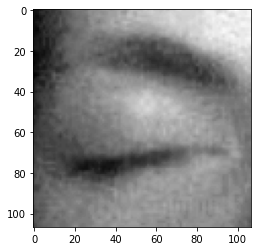

In [121]:
plt.imshow(img_array,cmap="gray")

In [122]:
img_array.shape

(107, 107)

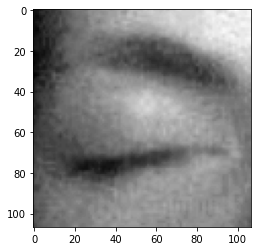

In [123]:
Datadirectory = "Test_Dataset"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break
        
    

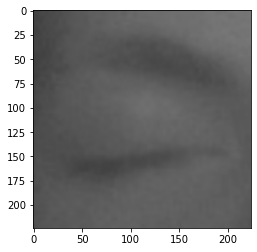

In [124]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

#reading all the images and coverting them into an array for data and labels


In [125]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [126]:
create_training_Data()

In [127]:
print(len(training_Data))

2119


In [128]:
import random

random.shuffle(training_Data)

In [129]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape( -1 , img_size , img_size,3)

In [130]:
X.shape

(2119, 224, 224, 3)

In [131]:
X = X/255.0;


In [132]:
Y = np.array(y)

In [133]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



In [134]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

#deep learning model for training - Training Learning

In [135]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [136]:

model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [137]:
#Transfer Learning

In [138]:
base_input=model.layers[0].input

In [139]:
base_output=model.layers[-4].output

In [140]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [141]:
new_model=keras.Model(inputs=base_input,outputs=final_output)



In [142]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [143]:
#settings for binary classification(open/closed)

In [144]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])



In [145]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)


60/60 [==============================] - 171s 3s/step - loss: 0.0704 - accuracy: 0.9754 - val_loss: 12.1795 - val_accuracy: 0.5519


In [146]:
new_model.save('my_model.h5')

In [147]:
#checking network for predictions

In [164]:
img_array=cv2.imread("s0001_02190_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [165]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [166]:
X_input.shape

(1, 224, 224, 3)

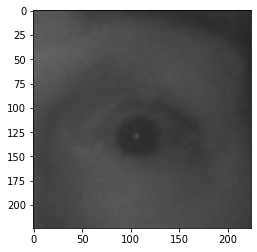

In [167]:
plt.imshow(new_array)

In [168]:
X_input=X_input/255.0

In [169]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 0s 20ms/step


In [170]:
prediction


array([[1.17256664e-11]], dtype=float32)